# <font color='blue'>Introduction to Inverse Problems</font>

---

> Samuel Farrens 2016

> email: [samuel.farrens@cea.fr](mailto:samuel.farrens@cea.fr)


## <font color='blue'>Contents</font>

---
 
1. [Set-Up](#Set-Up)
1. [Introduction](#Introduction)
1. [Linear Regression](#Linear-Regression)
 * [Mathematical Representation 1](#Mathematical-Representation-1)
 * [Straight Line Example](#Straight-Line-Example)
 * [Exercise 1](#Exercise-1)
1. [Deconvolution](#Deconvolution)
 * [Mathematical Representation 2](#Mathematical-Representation-2)
 * [Ideal PSF Example](#Ideal-PSF-Example)
 * [Exercise 2](#Exercise-2)
1. [Hints](#Hints)

## <font color='blue'>Set-Up</font>

---

Here we will import a couple of packages that we will need throughout the notebook.

In [1]:
# Tell Jupyter to display plots in this notebook.
%matplotlib inline

# Import the numpy package with the alias np.
import numpy as np           

# Import the pyplot package from matplotlib with the alias plt.
import matplotlib.pyplot as plt  
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

# Import some tools from scipy.
from scipy.ndimage import gaussian_filter
from scipy.misc import lena

## <font color='blue'>Introduction</font>

---

A standard "forward" problem is one in which data is obtained from model parameters, *i.e.*

$$\text{Model}\rightarrow\text{Data,}$$

while inverse problem is one in which the model parameters are determined from the data, *i.e.*

$$\text{Data}\rightarrow\text{Model.}$$

In other words, with an inverse problem one attemps to obtain information about a physical system from observed measurements. This can be very useful as some model parameters can not be measured directly.

Inverse problems have been applied various topics such as oceanography, weather prediction, astrophysics, medical imaging and geophysics.

> See the following links for more information about inverse problems:
> * [Wikipedia](https://en.wikipedia.org/wiki/Inverse_problem)
> * [Scatting Ideas](https://cmontalto.wordpress.com/2013/03/08/what-are-inverse-problems/)


## <font color='blue'>Linear Regression</font>

---

### <font color='green'>Mathematical Representation 1</font>

We will start by defining some variables. We will use $Y$ to represent data measurments/observations, $A$ to represent a given model and $X$ to represent a matrix of equations that relate the model data to the measured data. Now, we can pose a given problem as follows:

$$Y = XA$$

When dealing with forward problems $X$ and $A$ are know and can be used to obtain $Y$. For inverse problems $X$ and $Y$ are known and can be used to obtain $A$.

### <font color='green'>Straight Line Example</font>  

The best place to start is with something that should be intimately familiar to anyone with even the most basic background in mathematics, a straight line.


#### Equation of a Straight Line

A simple straight line can be represented with the following well known equation:

$$y = mx + b$$

where $m$ is the gradient or slope of the line and $b$ is the point where the line intercepts the $y$-axis. In Python we can implement the following function to represent this equation:

In [6]:
# Define the function y(x).
# This defines a function called y_func with input variables x, m and b, and returns the values of mx + b.
def y_func(x, m, b):
    
    return m * x + b

#### Forward Problem

The way one would normally approach this problem is when we have some data on the x-axis,

$$x = \begin{bmatrix} 8 & 2 & 11 & 6 & 5 & 4 & 12 & 9 & 6 & 11 \end{bmatrix}$$

and we know the slope and intercept of the line,

$$m = -1.1$$

$$b = 14.0$$

then we simply plug this information into the equation above to get the corresponding data on the y-axis. To think of the of this in terms of a forward problem, however, we need to know that the slope and intercept correspond to our model parameters and the data on the x-axis needs to be converted into a matrix operator. So, a better way of representing our line equation would be:

$$y = a_0x^0 + a_1x^1$$

In terms of our forward problem formulation ($Y=XA$), 

$$A = \begin{bmatrix} a_0 & a_1 \end{bmatrix}$$

and

$$X = \begin{bmatrix} 
1 & 8 \\
1 & 2 \\
1 & 11 \\
1 & 6 \\
1 & 5 \\
1 & 4 \\ 
1 & 12 \\
1 & 9 \\
1 & 6 \\
1 & 11 
\end{bmatrix}$$

We can implement this in python as follows:

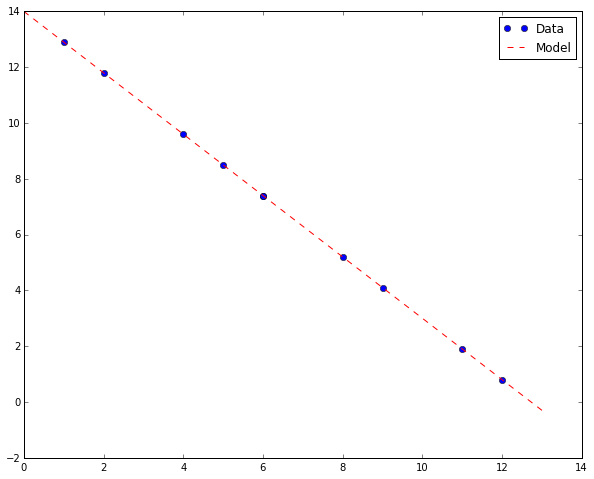

In [7]:
# Set points in x-axis.
x = np.array([8, 2, 11, 6, 5, 4, 12, 9, 6, 1])

# Define the matrix operator.
X = np.array([np.ones(x.size), x]).T

# Set the model values.
A = np.array([14.0, -1.1])

# Calculate Y.
Y = np.dot(X, A)

# Plot results.
plt.plot(x, Y, 'bo', label='Data')
plt.plot(np.arange(14), y_func(np.arange(14), A[1], A[0]), 'r--', label='Model')
plt.legend()
plt.show()

#### Inverse Problem

For the inverse problem we will assume we already know $Y$ and use this to work out $X$, so in other words we already have a set of data points and we want to work out the best fitting line.

$$x = \begin{bmatrix} 8 & 2 & 11 & 6 & 5 & 4 & 12 & 9 & 6 & 11 \end{bmatrix}$$

$$y = \begin{bmatrix} 3 & 10 & 3 & 6 & 8 & 12 & 1 & 4 & 9 & 14 \end{bmatrix}$$

and again

$$X = \begin{bmatrix} 
1 & 8 \\
1 & 2 \\
1 & 11 \\
1 & 6 \\
1 & 5 \\
1 & 4 \\ 
1 & 12 \\
1 & 9 \\
1 & 6 \\
1 & 11 
\end{bmatrix}$$

to solve this problem we need to invert $X$ *i.e.*

$$A = X^{-1}Y$$

however, $X$ is not a square matrix which means it cannot be inverted directly. So, first we need to multiply by $X^{T}$.

> Because $X \in \mathbb{R}^{m \times n}$ and $X^{T} \in \mathbb{R}^{n \times m}$ so $X^{T}X \in \mathbb{R}^{n \times n}$

So, the solution is

$$A = (X^TM)^{-1}X^{T}Y$$

which is often called the [Normal Equation](http://mathworld.wolfram.com/NormalEquation.html). We can implement this in python as follows:

A = [ 14.08108108  -1.10641892]


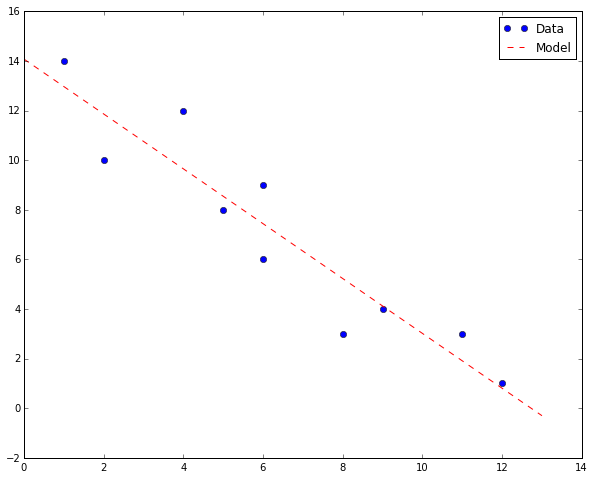

In [8]:
# This function implements the normal equation
def normal_eq(X, y):
    
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

# M is already defined in the notebook.

# Set points in y-axis.
y = np.array([3, 10, 3, 6, 8, 12, 1, 4, 9, 14])

# Solve for X.
A = normal_eq(X, y)

print 'A =', A

# Plot results.
plt.plot(x, y, 'bo', label='Data')
plt.plot(np.arange(14), y_func(np.arange(14), A[1], A[0]), 'r--', label='Model')
plt.legend()
plt.show()

### <font color='green'>Exercise 1</font>

For this exercise you should apply the techniques learned for fitting a straight line to a set of data points to a new set of data that requires a polynomial fit.

#### Equation of a Polynomial Line

The expression for a straigh line (*i.e.* $k = 1$) generalises to the following form for a $k$th degree polynomial:

$$y = a_0 + a_1x + a_2x^2 + ... + a_kx^k$$

where $a_i$ are the polynomial coefficients. We can represent this in Python with the following function:

In [9]:
#############################
# NO NEED TO EDIT THIS CELL #
#############################

# Define the new function y(x) for any kth degree polynomial.
# This defines a function called y_func2 with input variables x and a, and returns the values of a0 + a1x + a2x^2 + ...
def y_func2(x, a):
    
    return sum([(a_i * x ** n) for a_i, n in zip(a, range(a.size))])

The data for this exercise is the following:

| x    | y     |
|:----:|:-----:|
| 0.00 | 0.486 | 
| 0.05 | 0.866 | 
| 0.10 | 0.944 | 
| 0.15 | 1.144 | 
| 0.20 | 1.103 | 
| 0.25 | 1.202 | 
| 0.30 | 1.166 |
| 0.35 | 1.191 | 
| 0.40 | 1.124 | 
| 0.45 | 1.095 | 
| 0.50 | 1.122 |
| 0.55 | 1.102 |
| 0.60 | 1.099 |
| 0.65 | 1.017 |
| 0.70 | 1.111 |
| 0.75 | 1.117 |
| 0.80 | 1.152 |
| 0.85 | 1.265 |
| 0.90 | 1.380 |
| 0.95 | 1.575 |
| 1.00 | 1.857 |

These values have already been defined for you.

In [10]:
#############################
# NO NEED TO EDIT THIS CELL #
#############################

# The values for x and y.
x = np.linspace(0.0, 1.0, 21)
y = np.array([0.486, 0.866, 0.944, 1.144, 1.103, 1.202, 1.166, 1.191, 1.124, 1.095, 1.122, 1.102, 1.099, 1.017, 1.111, 
              1.117, 1.152, 1.265, 1.380, 1.575, 1.857])

Your job is to define the matrix operator $X$ and find the model parameters $A$ by solving the inverse problem $Y=XA$.
<font color='red'>EDIT THE CELL BELOW</font>

In [11]:
##############################
# YOU NEED TO EDIT THIS CELL #
##############################

# Define the matrix operator X here:
X = None

# Calculate the model paramters A here:
A = None

# ANSWERS
# X = np.array([np.ones(x.size), x, x ** 2, x ** 3]).T
# A = a_func(X, y)

Now you can test how well your model line fits the data.

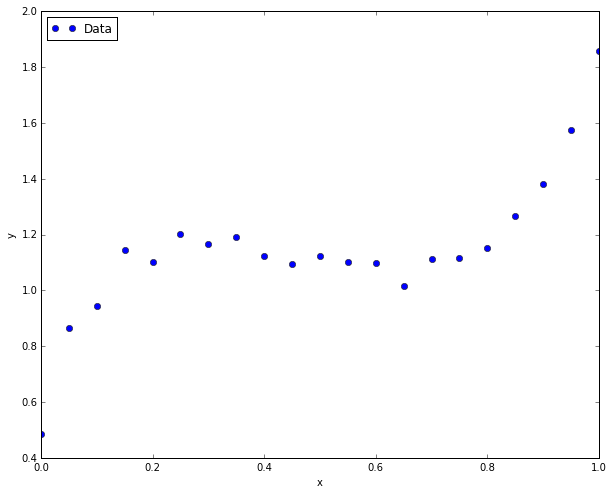

In [12]:
#############################
# NO NEED TO EDIT THIS CELL #
#############################

# Display the plot.
plt.plot(x, y, 'bo', label='Data') 
if not isinstance(A, type(None)):
    plt.plot(x, y_func2(x, A), 'g-', label='Model')
    plt.title('Best Fit Polynomial: k =' + str(len(A) - 1))
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## <font color='blue'>Deconvolution</font>

---

### <font color='green'>Mathematical Representation 2</font>

We will define $Y$ to represent an oberseved image, $X$ to represent a "true" image and $M$ to represent a distortion matrix so that we have an inverse problem of the following form:

$$Y = MX$$

In this case we wish to recover the true image, $X$, given some observed image, $Y$, and assuming that the distortion matrix, $M$, is known.

### <font color='green'>Ideal PSF Example</font>

We will start with an example of an image convolved with a known Point Spread Function (PSF). We can generate an idealised PSF in Python as follows:

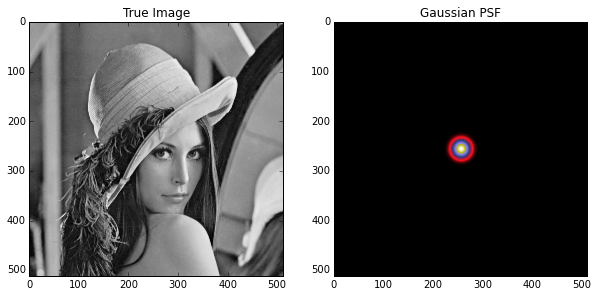

In [2]:
# Define true image.
X = lena()

# Generate a Gaussian PSF.
M = np.zeros(X.shape)
M[zip(np.array(M.shape) / 2)] = 1
M = gaussian_filter(M, 10)

# Display.
plt.subplot(121)
plt.imshow(X, cmap='gray')
plt.title('True Image')
plt.subplot(122)
plt.imshow(M, cmap='gist_stern')
plt.title('Gaussian PSF')
plt.show()

** Forward Problem **

Now we need to define our distortion matrix, which in this case will be the convolution of the PSF with the true image.

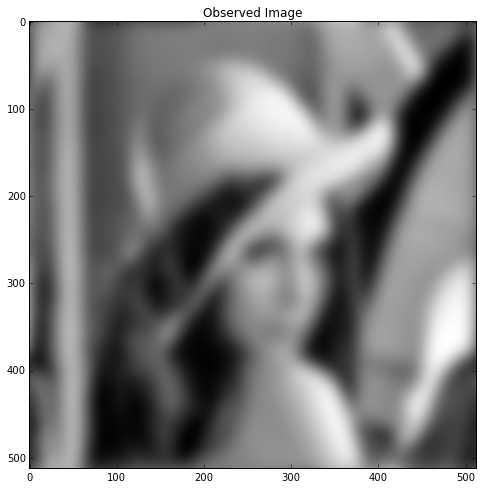

In [3]:
# This function convolves an image with a kernel using FFT.
def fftconvolve(image, kernel):

    x = np.fft.fftshift(np.fft.fftn(image))
    y = np.fft.fftshift(np.fft.fftn(kernel))

    return np.real(np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(x * y))))

# Produce the observed image.
Y = fftconvolve(X, M)

# Display
plt.imshow(Y, cmap='gray')
plt.title('Observed Image')
plt.show()

As you can see the PSF has blurred the true image.

** Inverse Problem **

The inverse problem corresponds to deconvolving the PSF effects from the image. In an ideal scenario this is simply: 

$$X = M^{-1}Y$$

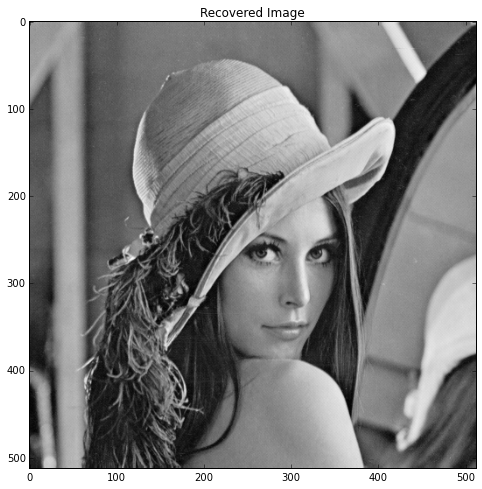

In [4]:
# This function deconvolves an image with a kernel using FFT.
def fftdeconvolve(image, kernel):

    x = np.fft.fftshift(np.fft.fftn(image))
    y = np.fft.fftshift(np.fft.fftn(kernel))

    return np.real(np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(x / y))))

# Recover the original image.
X_rec = fftdeconvolve(Y, M)

# Display
plt.imshow(X_rec, cmap='gray')
plt.title('Recovered Image')
plt.show()

### <font color='green'>Exercise 2</font>

For this exercise you need to add noise to the observed image and attempt to recover the true image.

The new problem can be posed as follows:

$$Y = MX + N$$

where $N$ corresponds to an additive noise component. Start by adding random noise to the observed image.
<font color='red'>EDIT THE CELL BELOW</font>

In [11]:
##############################
# YOU NEED TO EDIT THIS CELL #
##############################

# Set the noise level.
sigma = 0.0001

# Define the noise.
N = sigma * np.random.randn(*Y.shape)

# Add noise to the observed image.
# Y_noisy = None

# ANSWERS
Y_noisy = Y + N

Now you can see what the noisy image looks like.

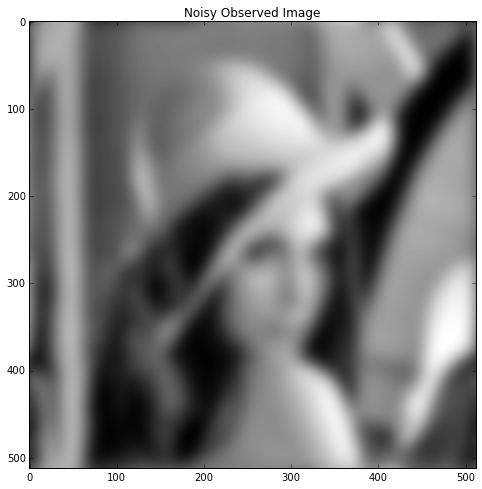

In [12]:
#############################
# NO NEED TO EDIT THIS CELL #
#############################

# Display
if not isinstance(Y_noisy, type(None)):
    plt.imshow(Y_noisy, cmap='gray')
    plt.title('Noisy Observed Image')
    plt.show()

Attemp to deconvolve the PSF effects from this noisy image.
<font color='red'>EDIT THE CELL BELOW</font>

In [13]:
##############################
# YOU NEED TO EDIT THIS CELL #
##############################

# Recover the original image.
# X_rec = None

# ANSWERS
X_rec = fftdeconvolve(Y_noisy, M)

Let's see what happens.

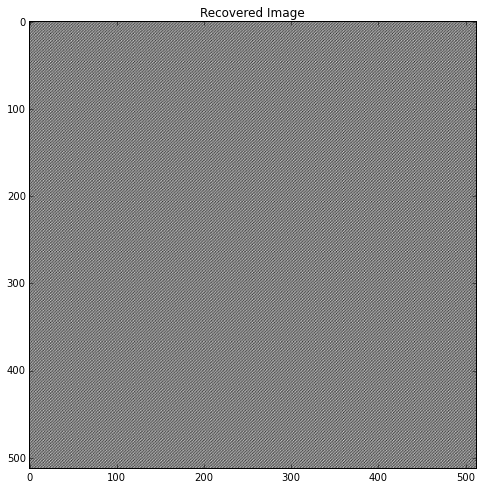

In [14]:
#############################
# NO NEED TO EDIT THIS CELL #
#############################

# Display
if not isinstance(X_rec, type(None)):
    plt.imshow(X_rec, cmap='gray')
    plt.title('Recovered Image')
    plt.show()

Did it work?

Try reducing the noise level and see what happens. Does this improve the results or not?

### <font color='green'>Gradient Descent</font>

Since we cannot use an analytical method to solve this problem we can instead try an iterative method such as gradient descent. For this approach we want to define a function that measures the accuracy of a given reconstruction.

$$F(X) = \frac{1}{2}\|Y-MX\|_2^2$$


 - Power Method converged after 7 iterations!


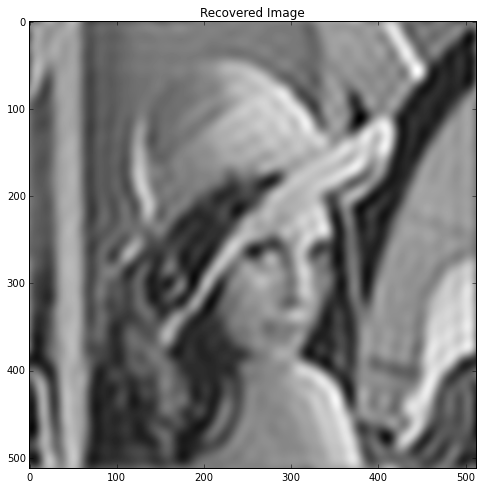

In [15]:
from tutorial_functions import *

# Recover the original image.
X_rec = gradient_descent(Y_noisy, M)

# Display
plt.imshow(X_rec, cmap='gray')
plt.title('Recovered Image')
plt.show()

## <font color='blue'>Hints</font>

---

** Exercise 1 Hints **

1. You do not need to redefine the function for the normal equation. 
2. The polynomial should have as many degrees as there are good Indiana Jones films. 

** Exercise 2 Hints **

1. The original observed image, Y, is still in memory.
2. The noise is ADDITIVE.
